# Probabilidad y Estadística para I.A. - Ejercicios clase 1

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

### Ejercicio 1

(a) ¿Cuál es la probabilidad de obtener exactamente 3 cecas en 10 tiradas
de una moneda balanceada?

R: Usando:
$$
\mathit
P(X=x) = \frac{n!}{k!(n-k)!} p^k q^{n-k} \tag{1}\label{1} \\
$$

dónde:

$$
n: \text{cantidad de intentos} \\
k: \text{cantidad de casos de éxito(ceca)} \\
p: \text{probabilidad de éxito(ceca)} \\
q: \text{probabilidad de fracaso(cara)} \\
$$

In [5]:
from scipy.stats import binom
binom.pmf(k=3,n=10,p=0.5)

0.11718750000000014

(b) ¿Cuál es la probabilidad de obtener al menos 3 cecas en 10 tiradas de
una moneda cargada donde la probabilidad de ceca es 0.4? 

R: Puede invertirse el planteo y reformularse como la probabilidad de que ocurran entre 0 y 7 caras:

$$
\mathit
P(X\ge x) = \sum_0^{k}\frac{n!}{k!(n-k)!} p^k q^{n-k} \tag{2}\label{2} \\
$$

dónde:

$$
n=10: \text{cantidad de intentos} \\
k=7: \text{cantidad de casos de éxito (cara)} \\
p=0.6: \text{probabilidad de éxito(cara)} \\
q=0.4: \text{probabilidad de fracaso(ceca)} \\
$$


In [6]:
binom.cdf(k=7,n=10,p=0.6)

0.8327102464

(c) Una moneda cargada con probabilidad de ceca 0.4 es arrojada al aire. El resultado es cara. ¿Cuál es la probabilidad de obtener al menos 3 cecas en las próximas 10 tiradas?

R: Los eventos son independientes, por lo tanto el primer resultado no condiciona los siguientes. El resultado es el mismo que el ejercicio anterior.

(d) Simular los items anteriores en Octave usando: 
    - i) una distribución uniforme con la función rand para simular el proceso Bernoulli
    - ii) las funciones binopdf,binocdf para calcular la probabilidad binomial (Octave statistics package).

In [4]:
coin_tosses = np.random.rand(10)>= 0.5
coin_tosses

array([ True,  True, False,  True, False,  True,  True, False,  True,
        True])

### Ejercicio 2

a) En una competencia se tienen 3 puertas de las cuales se debe elegir una. Dos puertas tienen la foto de un chancho y la tercera tiene la foto de un automóvil. Si el participante acierta la puerta del
automóvil, lo gana. En caso contrario, no gana nada. Una vez que el participante elige una puerta, aún con todas las puerta cerradas, el organizador de la competencia - que sabe en qué puerta se encuentra
la foto del automóvil - abre una de las tres puertas que tiene la foto de un chancho. ¿Qué le conviene hacer al participante, cambiar su elección o no? Justificar usando probabilidad a priori y probabilidad
condicional.

R: sea Y la variable aleatoria discreta que puede tomar los valores a,b,c (por cada una de las puertas) y x la evidencia, en la primera iteración dado que no hay ninguna evidencia las probabilidades están uniformemente distribuidas para cada puerta A,B,C.

$$
P(Y=a|x) = \frac{1}{3} \\
P(Y=b|x) = \frac{1}{3} \\
P(Y=c|x) = \frac{1}{3} \\
$$

Cuando el presentador abre una de las puertas (supongamos la C) y demuestra que no hay nada, se obtiene más información (evidencia) que actualiza las probabilidades a priori.

$$
P(Y=a|x) = \frac{1}{2} \\
P(Y=b|x) = \frac{1}{2} \\
P(Y=c|x) = 0 \\
$$

Consulta: revisar cómo plantear/notación.

### Ejercicio 3

(a) Sean X , Y dos v.a. i.i.d. U[0, 1]. Encontrar la expresión de la función de densidad de probabilidad conjunta.

R: 

$$
    F_X(X<=x)= \int_{-\infty}^{x}p_X(x)dx = x\\
    F_Y(X<=x)= \int_{-\infty}^{x}p_Y(x)dx = x\\
    F_{XY}(X\le x,Y\le y)= \int_{-\infty}^{x}p_X(x)dx \int_{-\infty}^{y}p_Y(y)dy = x y \\
$$

(b) ¿Cuál es la probabilidad de que X > 0.7 y Y < 0.4 simultáneamente?

R: 

$$
    F_X(X > 0.7)= 1 - F_X(X <= 0.7) = 1 - 0.7 \\
    F_Y(X<0.4)= \int_{-\infty}^{x}p_Y(x)dx = 0.4 \\
    F_{XY}(X > 0.7,Y < 0.4)= F_X(X > 0.7) F_Y(X<0.4) = (1-0.7) 0.4 \\
$$

Nota: revisar mayor/menor igual

In [5]:
(1-0.7)*0.4

0.12000000000000002

(c) ¿Cuál es el percentil 40 de X , i.e. x 40 ?

In [6]:
from scipy.stats import uniform
uniform.cdf(0.4)

0.4

(d) Simular en Octave escribiendo la pdf conjunta o usando funciones de Octave rand,unifpdf,unifcdf

In [7]:
from scipy.stats import uniform

In [8]:
(1-uniform.cdf(0.7))*uniform.cdf(0.4)

0.12000000000000002

(e) Graficar la cdf en función de x, y

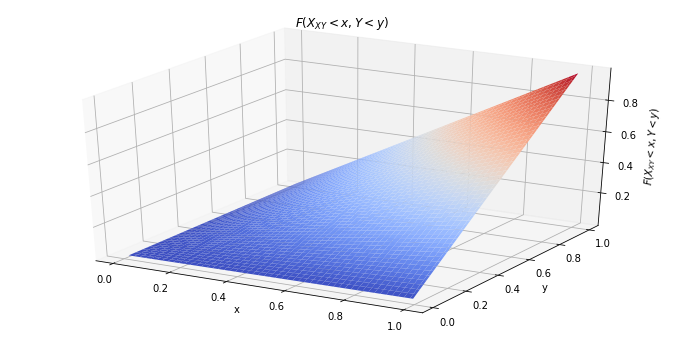

In [9]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
y = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
prob = x*y

def plot_joint_cdf(x,y,prob, title):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x, y)
    prob= X*Y
    ax.plot_surface(X, Y, prob,  cmap=cm.coolwarm, linewidth=0,  antialiased=True)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel(title)
    plt.title(title)
    plt.show()
    
plot_joint_cdf(x,y,prob,"$F(X_{XY}<x,Y<y)$")

### Ejercicio 4

(a) SeanX , Y dos v.a. i.i.d. N (0, 1). Encontrar la expresión de la función de densidad de probabilidad conjunta.

$$
p_Z(z) = \frac{1}{\sqrt{2 \pi}} \exp{\frac{-z^2}{2}} \\
\Phi(Z \le z) =  \int_{-\infty}^{z}p_Z(z)dz \\
$$

(b) ¿Cuál es la probabilidad de que X > 0.7 y Y < 0.4 simultáneamente?

$$
\Phi(X > 0.7, Y<0.4) =  (1 - \Phi(Z < 0.7)) \Phi(Z < 0.4)
$$

(c) Simular en Octave escribiendo la pdf conjunta o usando funciones de Octave mvnrnd,mvnpdf,mvncdf

In [10]:
from scipy.stats import norm

x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
prob = (1-norm.cdf(0.7))*norm.cdf(0.4)
prob

0.1585882383464413

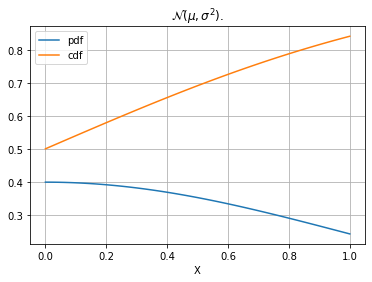

In [11]:
plt.plot(x,norm.pdf(x),x,norm.cdf(x))
plt.title("$\mathcal{N}(\mu,\sigma^2).$")
plt.legend(["pdf","cdf"])
plt.xlabel("X")
plt.grid(which="Both")

(d) Graficar la cdf en función de x, y

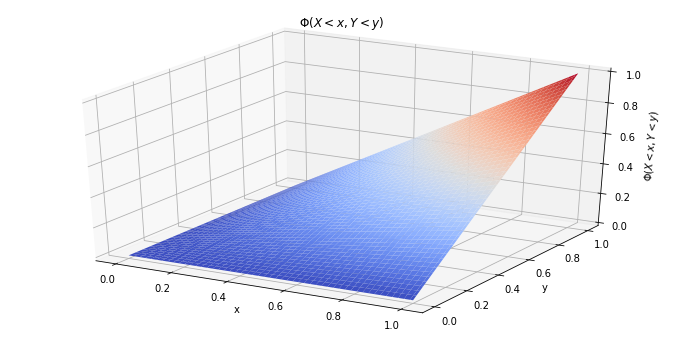

In [12]:
prob = norm.cdf(x)*norm.cdf(y)
plot_joint_cdf(x,y,prob, "$\Phi(X < x,Y < y)$")